In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'performance-in-olympics-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5578245%2F9223683%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240823%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240823T172807Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D25f226fa29016f98150666637c1c08c20073d009ba874396a28ebb5fd5212299f819b2638a52afc90cf123559a16d66faec3de816cdf70fc421c2bf50bfe923ae404166ef291e8582cb7578d19789c032ac67f1c52a8129d34939206ea1c3775bfaa9871693381f5858afcd1e9b9cb329e8fbc020c1e5ab5f187eee24c1e1676799842f0e2532b85bd1180308dbcd242e60632b32db1de63e5201f4b032711ae2494a9fe32b63b2a62d2dc6c3b4970691d6144c7942c90d250dca035aad3053895795afd105f9164ce9e789e9a648b84f1906e6b4873b34f47240234bb229b1bce989820ea18b698e8764fe27108db12b5f657e9b3a471936739c668906a95e1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 31092 bytes downloaded
Downloaded and uncompressed: performance-in-olympics-prediction
Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/performance-in-olympics-prediction/teams.csv


# **Loading Data**

In [6]:
import pandas as pd

In [7]:
teams=pd.read_csv("/kaggle/input/performance-in-olympics-prediction/teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [8]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [9]:
#to check for columns which are highly correlated with
#medals column and can be used to predict value of medals column

teams.corr(numeric_only=True)["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


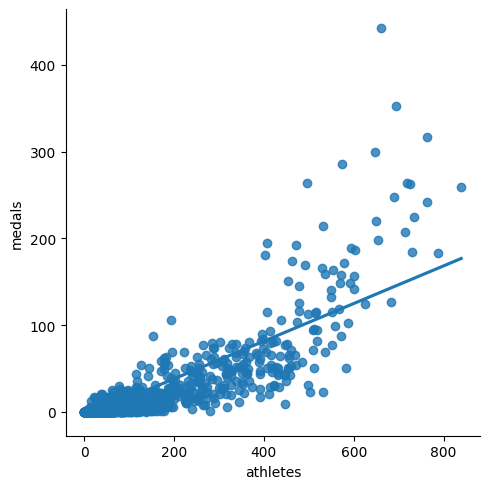

In [10]:
import seaborn as sns
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

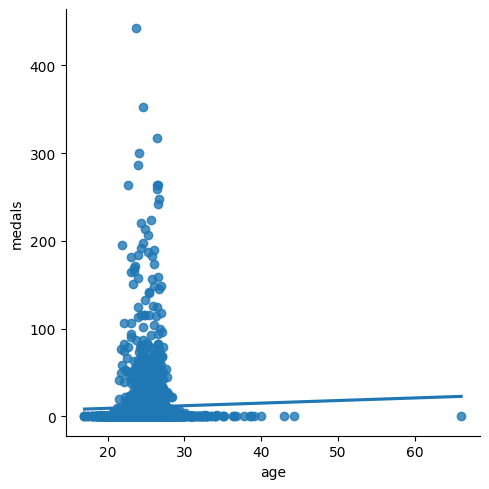

In [11]:
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

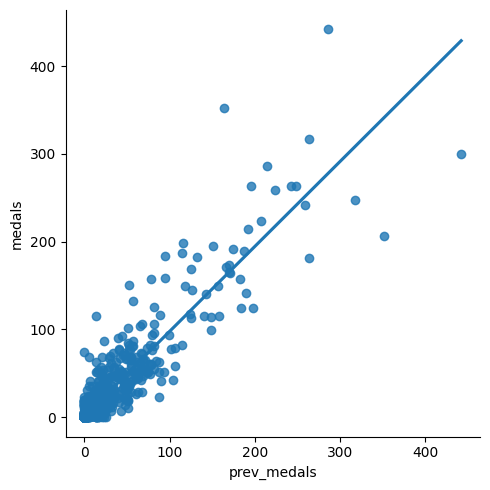

In [12]:
sns.lmplot(x="prev_medals",y="medals",data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

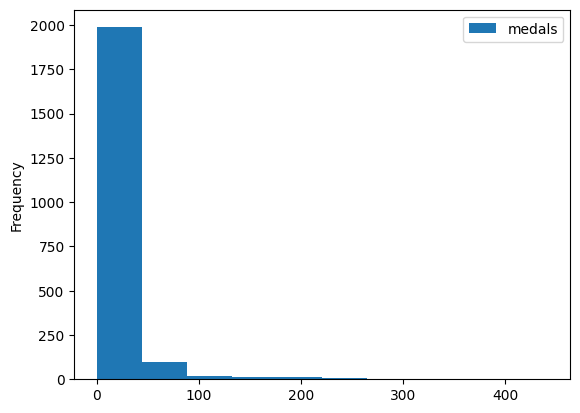

In [13]:
#to look at how many countries fall into each bin for number of
#medals they won
teams.plot.hist(y="medals")

# **Data Cleaning**

In [14]:


#to find missing  values
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [15]:
#to remove rows with null values
teams=teams.dropna()


teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [16]:
#splitting training and test set bcoz we want to be able to train
#our model on the training set and use a different set to evaluate how well the model is doing.
#we dont want to train the model on train set and evaluate how well its doing on train set bcoz
#thats like giving somebody all answers to tesr before they take the test.
#we want model to predict based on data that it has never seen before.

train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [17]:
train.shape

(1609, 7)

In [18]:
test.shape

(405, 7)

# **Linear Regression**

In [19]:
#LinearRegression class enables us to train and make predictions with a linear model.
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

#predictors are the columns that we are going to use to predict our target

predictors=["athletes","prev_medals"]
target="medals"

In [52]:
# here we are training our algorithm on predictors columns from train dataset
# and medals column of train datset is the target we are going to pass into the algorithm.
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [53]:
lr_predictions=reg.predict(test[predictors])
lr_predictions
#here,there are a couple of things to notice.First, these values are not whole nos,which is not correct as compared to our scenario,
#as Medals won can be in whole nos. only. Second, some of the values here are -ve, which is not possible as no country can have -ve number of medals.


array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [55]:
#Corrections to correct the model to prevent any negatives and to round our numbers.

#assign predictions to the column predictions in test dataset ,so we can easily modify its values acc. to our requirement.
test["lr_predictions"]=lr_predictions

test.loc[test["lr_predictions"]<0,"lr_predictions"]=0
#turns the rows with negative values of prediction into zero value

#we will round all predictions to nearest whole no.
test["lr_predictions"]=test["lr_predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions,rf_predictions,lr_predictions,lr_redictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,0.0,0.0,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,0.0,0.0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,0.0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,0.0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,2.0,2.0,2.0


In [56]:
from sklearn.metrics import mean_absolute_error

error=mean_absolute_error(test["medals"],test["lr_predictions"])
# we call the mean absolute error function and pass our actual value of medals and predicted values to find the error

error
#this actually means that on an average we were within 3.3 medals of how many medals a team actually won in olympics


3.2987654320987656

In [57]:
#now to investigate if this error is a good error or not
teams.describe()["medals"]

#so, it is usuallly nice that your error is less than standard deviation
#if error is higher than std deviation, so usually something is wrong ,either you are using
#predictors that just dont give you any information to predict the target or you mess sthing up with your model.

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


# **Random Forest**


In [39]:
#Random Forest model.
from sklearn.ensemble import  RandomForestRegressor
rf= RandomForestRegressor()

#predictors are the columns that we are going to use to predict our target

predictors=["athletes","prev_medals"]
target="medals"

In [43]:
rf.fit(train[predictors],train["medals"])

RandomForestRegressor()

In [59]:
rf_predictions=rf.predict(test[predictors])
rf_predictions
#here,there are a couple of things to notice.First, these values are not whole nos,which is not correct as compared to our scenario,
#as Medals won can be in whole nos. only. Second, some of the values here are -ve, which is not possible as no country can have -ve number of medals.


array([1.26712944e-02, 1.12127660e-02, 5.40877318e-02, 4.59560753e-02,
       2.49973810e+00, 6.38500000e+00, 4.59560753e-02, 3.20299451e-02,
       7.45575230e-01, 5.49880371e-01, 3.20299451e-02, 4.35384792e-02,
       4.78500000e+01, 2.51600000e+01, 2.30000000e+00, 3.67666667e+00,
       3.20299451e-02, 1.81268527e-02, 3.20299451e-02, 3.20299451e-02,
       1.30580000e+02, 1.40640000e+02, 2.63483333e+00, 1.84000000e+00,
       6.33000000e+00, 8.48000000e+00, 6.10666667e+00, 5.54000000e+00,
       1.81268527e-02, 1.81268527e-02, 4.33743238e-02, 4.66652780e-02,
       4.59560753e-02, 5.40877318e-02, 2.79000000e+00, 3.34000000e+00,
       6.61715176e-02, 4.59560753e-02, 4.33743238e-02, 4.33743238e-02,
       0.00000000e+00, 0.00000000e+00, 4.33743238e-02, 3.64208011e-02,
       2.23639433e-02, 2.23639433e-02, 3.01000000e+01, 2.05700000e+01,
       6.61715176e-02, 1.93607093e-01, 3.20299451e-02, 8.66316275e-02,
       5.79100000e+01, 1.26670000e+02, 3.36355429e-01, 2.53369048e-01,
      

In [60]:
#Corrections to correct the model to prevent any negatives and to round our numbers.

#assign predictions to the column predictions in test dataset ,so we can easily modify its valuesacc. to our requirement.
test["rf_predictions"]=rf_predictions

#we will round all predictions to nearest whole no.
test["rf_predictions"]=test["rf_predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions,rf_predictions,lr_predictions,lr_redictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,0.0,0.0,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,0.0,0.0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,0.0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,0.0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,2.0,2.0,2.0


In [61]:
from sklearn.metrics import mean_absolute_error

# we call the mean absolute error function and pass our actual value of medals and predicted values to find the error
rf_error=mean_absolute_error(test["medals"],test["rf_predictions"])

rf_error


3.8123456790123456

# **Evaluation of Both Models**

In [62]:
#to look for predictions team by team for different countries
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions,rf_predictions,lr_predictions,lr_redictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0,328.0,285.0,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0,252.0,236.0,236.0


errors in LR model are: 6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64
errors in RF model are: 6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    1.0
Length: 405, dtype: float64


In [66]:
#look at our error country by country basis
lr_errors=(test["medals"]-test["lr_predictions"]).abs()
print("errors in LR model are:" ,lr_errors)

rf_errors=(test["medals"]-test["rf_predictions"]).abs()
print("errors in RF model are:" ,rf_errors)


errors in LR model are: 6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64
errors in RF model are: 6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    1.0
Length: 405, dtype: float64


In [78]:
#grouping these errors by team and then we will calculate the mean error for that team

lr_error_by_team=lr_errors.groupby(test["team"]).mean()
rf_error_by_team=rf_errors.groupby(test["team"]).mean()

print("error by team acc. to LR is:\n ",lr_error_by_team)
print("\n")
print("error by team acc. to RF is:",rf_error_by_team)
#this tells how many medals off we were for each country

error by team acc. to LR is:
  team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64


error by team acc. to RF is: team
AFG    0.5
ALB    0.0
ALG    2.5
AND    0.0
ANG    1.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.5
Length: 204, dtype: float64


In [79]:
#now to look at how many medals each country earned on average

medals_by_team=test["medals"].groupby(test["team"]).mean()

#then we can find the ratio between our errors and actual medals earned,teamwise or countrywise
lr_error_ratio=(lr_error_by_team / medals_by_team)
print("LR error ratio:")
lr_error_ratio

LR error ratio:


,0
team,
AFG,1.0
ALB,NaN
ALG,1.0
AND,NaN
ANG,NaN
...,...
VIE,1.0
VIN,NaN
YEM,NaN


In [80]:
rf_error_ratio=(rf_error_by_team / medals_by_team)
print("RF error ratio:")
rf_error_ratio

RF error ratio:


,0
team,
AFG,1.000000
ALB,NaN
ALG,1.666667
AND,NaN
ANG,inf
...,...
VIE,1.000000
VIN,NaN
YEM,NaN


In [83]:
import numpy as np


#to take only values that are not missing
lr_error_ratio[~pd.isnull(lr_error_ratio)]
rf_error_ratio[~pd.isnull(rf_error_ratio)]

#to clean infinite values
lr_error_ratio=lr_error_ratio[np.isfinite(lr_error_ratio)]
rf_error_ratio=rf_error_ratio[np.isfinite(rf_error_ratio)]


lr_error_ratio


,0
team,
AFG,1.000000
ALG,1.000000
ARG,0.853659
ARM,0.428571
AUS,0.367347
...,...
UKR,0.951220
USA,0.126953
UZB,0.625000


In [84]:
print("\n")
rf_error_ratio

,0
team,
AFG,1.000000
ALG,1.666667
ARG,0.780488
ARM,0.142857
AUS,0.387755
...,...
UKR,0.512195
USA,0.179688
UZB,0.437500


Error ratio plot for Linear Regression :


<Axes: ylabel='Frequency'>

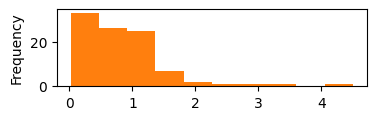

In [85]:

print("Error ratio plot for Linear Regression :")
lr_error_ratio.plot.hist()
#this tells us that error ratio of 0 to 0.5 means that you are within 50% of actual medal count,
#but in some cases, error ratio is 2 and above which means our prediction were twice as high as
#actual medals or half of the actual medals.

Error ratio plot for Random Forest :


<Axes: ylabel='Frequency'>

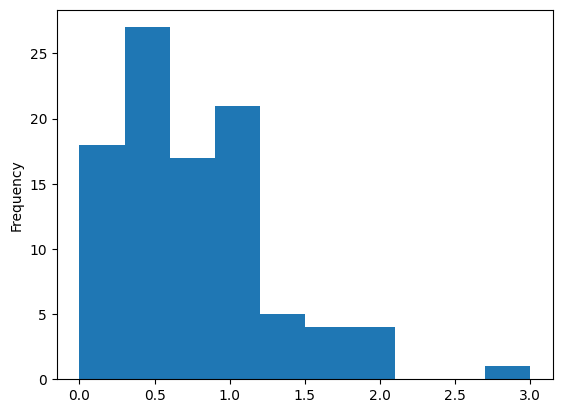

In [86]:
print("Error ratio plot for Random Forest :")
rf_error_ratio.plot.hist()

In [87]:
lr_error_ratio.sort_values()

,0
team,
FRA,0.022472
CAN,0.048387
NZL,0.063492
RUS,0.082353
ITA,0.121429
...,...
MAR,2.000000
EGY,2.400000
HKG,3.000000


In [88]:
rf_error_ratio.sort_values()

,0
team,
TUN,0.000000
HUN,0.083333
CAN,0.088710
ESP,0.111111
ARM,0.142857
...,...
HKG,2.000000
POR,2.000000
UAE,2.000000


In [ ]:
# So what you wanna do to determine if this model works for your purposes is to look through
# the error ratios for the countries that you want to make predictions for.
# So whether or not this model is good depends on if it can do well on what you want it to do well in.

In [34]:
#to improve the accuracy and performance of the model:
    # 1. You can add more predictors to the model.
    # 2. Can try different machine learning models
    # like a random forest or neural network to see if they perform better.
    # 3. Measure the error more predictably
    # 4. You can build different models for country with more medals and countries with less medals
    # 5. You can try to reshape some of the columns using different mathematical transformations to
    #see if that creates a more linear correlation.
